# Run tomography experiments

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
from mock import MagicMock
import json

import numpy as np
from grove.tomography.state_tomography import do_state_tomography
from grove.tomography.utils import notebook_mode
from grove.tomography.process_tomography import do_process_tomography


from pyquil.gates import CZ, RY
from pyquil.api import QVMConnection, QPUConnection, get_devices, Job
from pyquil.quil import Program

try:
    # inline plotting
    %matplotlib inline
    # get fancy TQDM progress bars
    notebook_mode(True)
except:
    pass

NUM_SAMPLES = 2000

# Set this flag if you want to send programs to Forest.
SEND_PROGRAMS = False

if SEND_PROGRAMS:
    qvm = QVMConnection()
    # QPU
    online_devices = [d for d in get_devices() if d.is_online()]
    if online_devices:
        d = online_devices[0]
        qpu = QPUConnection(d.name)
        print("Found online device {}, making QPUConnection".format(d.name))
    else:
        qpu = QVMConnection()
        print("Could not find online device, defaulting to QVM")
else:
    qvm = MagicMock(QVMConnection)
    qvm_job = MagicMock(Job)
    qvm.wait_for_job.return_value = qvm_job
    qvm_job.result.side_effect = json.load(open("qvm.json", 'r'))
    qpu = MagicMock(QPUConnection)
    qpu_job = MagicMock(Job)
    qpu.wait_for_job.return_value = qpu_job
    qpu_job.result.side_effect = json.load(open("qpu.json", 'r'))

Found online device 19Q-Acorn, making QPUConnection


## Entangled state tomography

### Create a Bell state

In [3]:
qubits = [5, 10]
bell_state_program = Program(RY(-np.pi/2, qubits[0]),
                             RY(np.pi/2, qubits[1]),
                             CZ(qubits[0],qubits[1]),
                             RY(-np.pi/2, qubits[1]))

### Run on QPU & QVM, and calculate the fidelity

In [4]:
%%time
print("Running state tomography on the QPU...")
state_tomography_qpu, _, _ = do_state_tomography(bell_state_program, NUM_SAMPLES, qpu, qubits)
print("State tomography completed.")
print("Running state tomography on the QVM for reference...")
state_tomography_qvm, _, _ = do_state_tomography(bell_state_program, NUM_SAMPLES, qvm, qubits)
print("State tomography completed.")

Running state tomography on the QPU...


HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

job oHWAyTdThYslpEXL is currently running
job zJMyuPUkIZMoGFXf is currently running
job ICGVxNPUtsVthzCg is currently queued at position 0
job ICGVxNPUtsVthzCg is currently running
job SDyVuwvumiHJUEzv is currently running



HBox(children=(IntProgress(value=0, max=16), HTML(value=u'')))

job GCESOAjqKeyBZaYL is currently queued at position 0
job CXayAFHDqRhepVYR is currently queued at position 0
job CXayAFHDqRhepVYR is currently running
job WjjvdWQKOemEDQWb is currently queued at position 0
job jyhdBwiTVDgMWITh is currently running
job zzeYjvltsxJTiXqh is currently queued at position 0
job zzeYjvltsxJTiXqh is currently running
job vnVCNmFNDuWxtCLo is currently queued at position 0
job nnOKjCrkETwOLyMv is currently running
job IybzYYaLAtwoHWla is currently queued at position 0
job bdgqbpXLhwEHNsTR is currently queued at position 0
job bdgqbpXLhwEHNsTR is currently running
job CdklwcGjZqjHCazc is currently running
job UangZhPxwpwVeHOo is currently running
job osYJMiVAAHSFwklP is currently queued at position 0
job osYJMiVAAHSFwklP is currently running
job SicdBJXumNoclsFH is currently queued at position 0
job BxAKVtMJqpCunCdY is currently running
job ircBsZUULbQBdRSR is currently queued at position 0
job ircBsZUULbQBdRSR is currently running
job qRYGtSJfFaljaZaV is curren

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=16), HTML(value=u'')))


State tomography completed.
CPU times: user 7.35 s, sys: 549 ms, total: 7.9 s
Wall time: 1min 16s


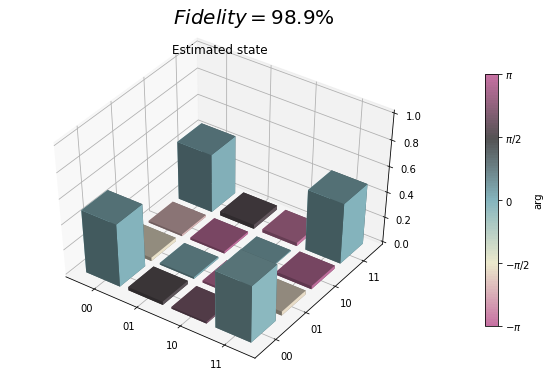

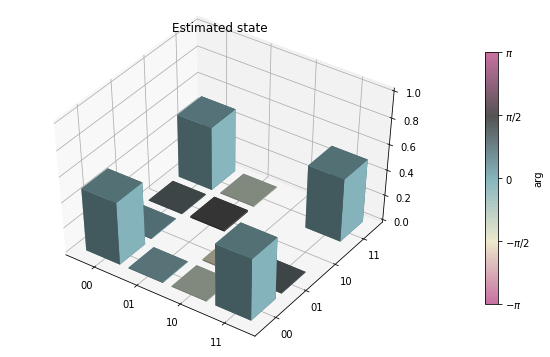

In [5]:
state_fidelity = state_tomography_qpu.fidelity(state_tomography_qvm.rho_est)

if not SEND_PROGRAMS:
    EPS = .01
    assert np.isclose(state_fidelity, 1, EPS)

qpu_plot = state_tomography_qpu.plot();
qpu_plot.text(0.35, 0.9, r'$Fidelity={:1.1f}\%$'.format(state_fidelity*100), size=20)

state_tomography_qvm.plot();

## Process tomography

### Perform process tomography on a controlled-Z (CZ) gate

In [6]:
qubits = [5, 10]
CZ_PROGRAM = Program([CZ(qubits[0], qubits[1])])
print(CZ_PROGRAM)

CZ 5 10



#### Run on the QPU & QVM, and calculate the fidelity

In [7]:
%%time
print("Running process tomography on the QPU...")
process_tomography_qpu, _, _ = do_process_tomography(CZ_PROGRAM, NUM_SAMPLES, qpu, qubits)
print("Process tomography completed.")
print("Running process tomography on the QVM for reference...")
process_tomography_qvm, _, _ = do_process_tomography(CZ_PROGRAM, NUM_SAMPLES, qvm, qubits)
print("Process tomography completed.")

Running process tomography on the QPU...


HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

job eeQGCHhgZaqxeRjW is currently running
job VtnjnqNrrNAAcQTR is currently queued at position 0
job VtnjnqNrrNAAcQTR is currently running
job lWKMkkMDYSPlPzVn is currently queued at position 0
job nCYEnOsFRjMgQlrP is currently running



HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))

job UEgFoFFKoSweSUJu is currently running
job sUAtqbSGykrjREGB is currently queued at position 0
job sUAtqbSGykrjREGB is currently running
job JVBDeUcDEMlSYuJc is currently running
job QayrpNEUUdfgATnk is currently queued at position 0
job QayrpNEUUdfgATnk is currently running
job DBtcueqMWjegbyiV is currently running
job KqtlzjfKihYdjQnx is currently queued at position 0
job KqtlzjfKihYdjQnx is currently running
job fdZFQBIVDOexPitO is currently running
job JBGALJcuNhzzHNqk is currently queued at position 0
job JBGALJcuNhzzHNqk is currently running
job oebRggCoxgOsGBIM is currently running
job zrGSOhmvOOZjLtaW is currently queued at position 0
job zrGSOhmvOOZjLtaW is currently running
job IZDatokfJIQIuHEx is currently running
job suQZKTXQbSOVLVev is currently queued at position 0
job epPqVqtEHaaNQwJU is currently queued at position 0
job epPqVqtEHaaNQwJU is currently running
job bolbGyeAUXBCiLAi is currently running
job lVBXYsUApSbRVgkv is currently running
job MndbgMJHfRBTpvqC is cur

job JRJFrSELtXnnrrxn is currently running
job brjSpCHNlkFkvtJY is currently queued at position 0
job brjSpCHNlkFkvtJY is currently running
job deipQVRJSZqkPmfb is currently queued at position 0
job dzjVcmUpHtBmhfdk is currently queued at position 0
job UqGiaoCxtPIIIzeA is currently queued at position 0
job UqGiaoCxtPIIIzeA is currently running
job yoSAohUNTganrsuy is currently running
job pUjQGnjkeKrJicJw is currently running
job oncNMMBCKGOltePY is currently queued at position 0
job oncNMMBCKGOltePY is currently running
job LZvVQrLCzndhAPRC is currently running
job IqIePvFNfgXHixFT is currently queued at position 0
job CZPiWqWCDzpRDKeP is currently queued at position 0
job CZPiWqWCDzpRDKeP is currently running
job bJJUNwUFNGdOaauK is currently running
job YPbFlQrucBkGyLRt is currently queued at position 0
job XwPNiNZPMleVRRjl is currently queued at position 0
job XwPNiNZPMleVRRjl is currently running
job rjEyqKZBLJTRhRuu is currently queued at position 0
job pCtplNUSpndvFGBV is curren

job MLYtRftJFcGZUlCz is currently running
job PYDtdNtcftzFlEPU is currently queued at position 0
job PYDtdNtcftzFlEPU is currently running
job hdJdYafjupCPLSYi is currently running
job SVuchhpxVdmRSXtH is currently running

Process tomography completed.
Running process tomography on the QVM for reference...


HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


Process tomography completed.
CPU times: user 1min 35s, sys: 6.82 s, total: 1min 42s
Wall time: 17min 38s


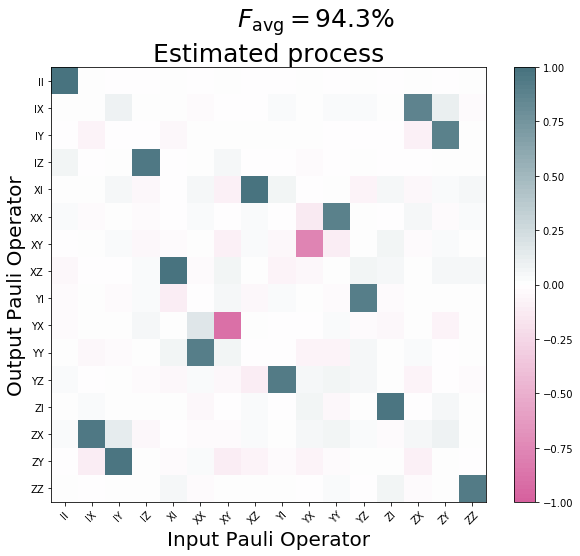

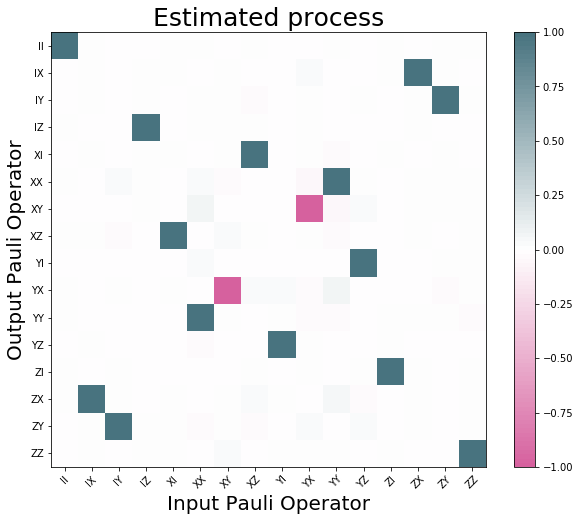

In [8]:
process_fidelity = process_tomography_qpu.avg_gate_fidelity(process_tomography_qvm.r_est)

if not SEND_PROGRAMS:
    EPS = .01
    assert np.isclose(process_fidelity, 1, EPS)

qpu_plot = process_tomography_qpu.plot();
qpu_plot.text(0.4, .95, r'$F_{{\rm avg}}={:1.1f}\%$'.format(process_fidelity*100), size=25)

process_tomography_qvm.plot();